# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

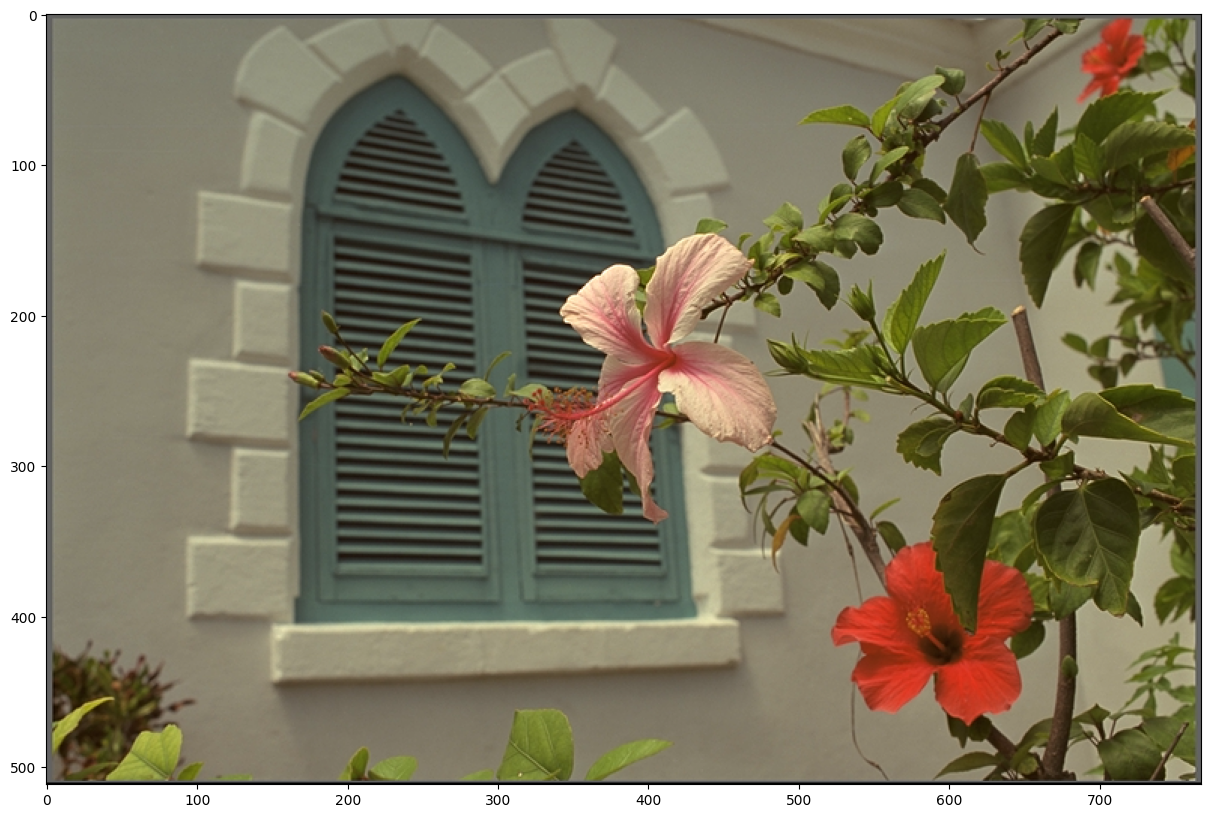

In [36]:
img = cv2.imread('data/kodim07.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

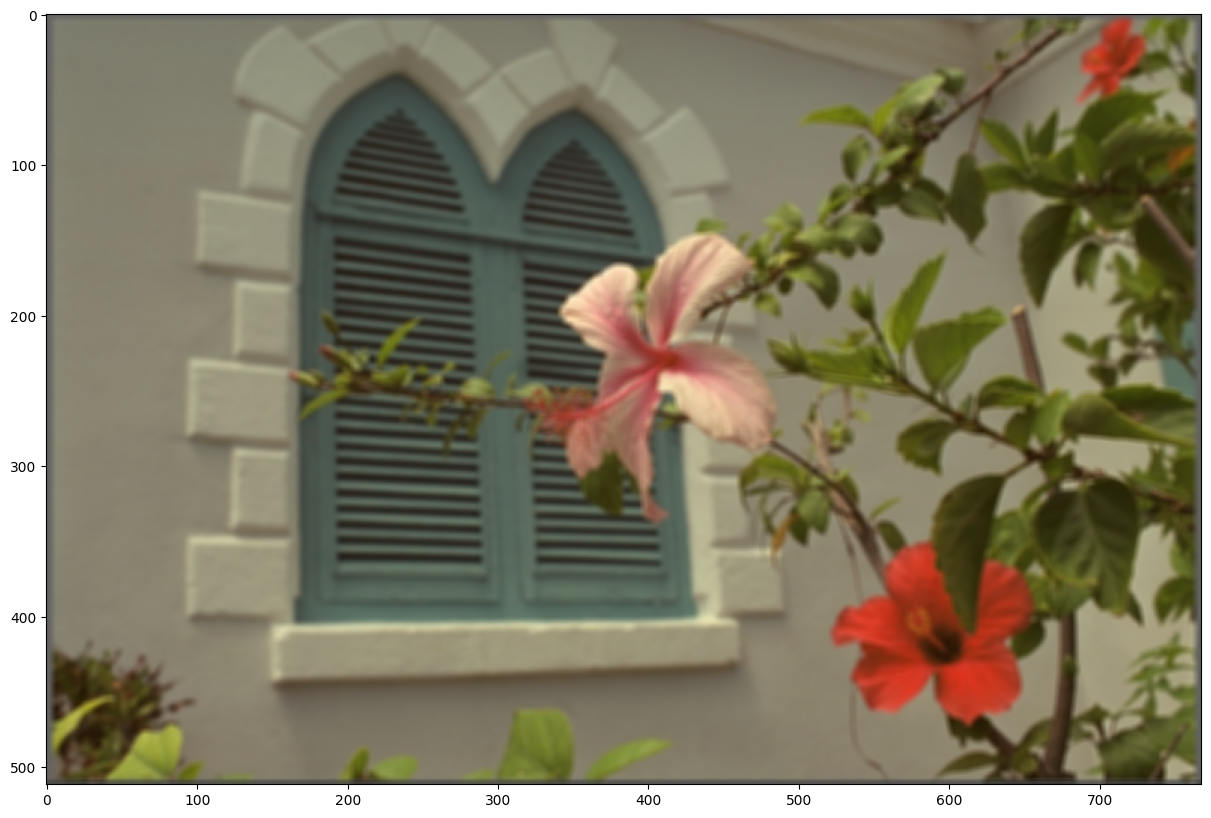

In [37]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(unsharp )

In [38]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

img=img.astype(np.float32)
diff = img-unsharp


(<Axes: title={'center': 'Sharpened amount=-2'}>,
 Text(0.5, 1.0, 'Sharpened amount=-2'))

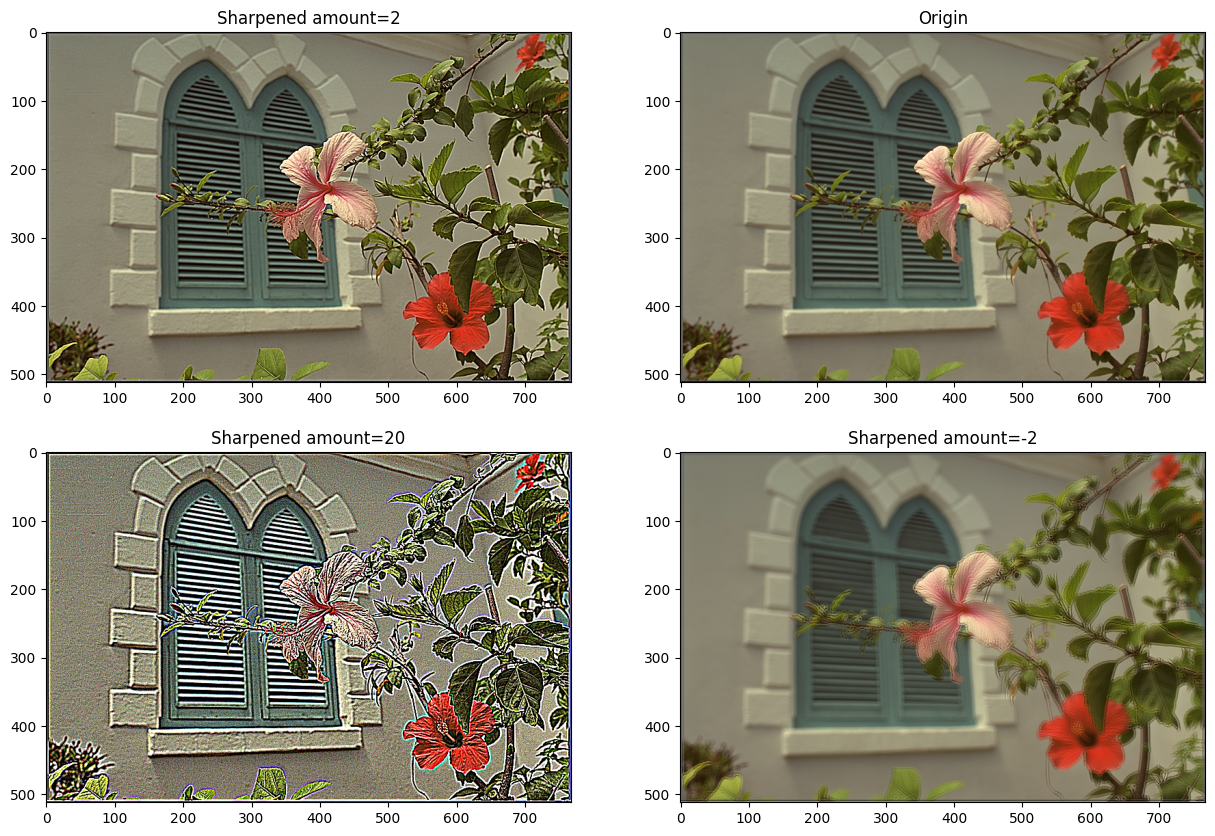

In [53]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount1=2
sharpened1 = img+diff*amount1
sharpened1=np.clip(sharpened1,0,255)
sharpened1=sharpened1.astype(np.uint8)



amount2=20
sharpened2 = img+diff*amount2
sharpened2=np.clip(sharpened2,0,255)
sharpened2=sharpened2.astype(np.uint8)


amount3=-2
sharpened3 = img+diff*amount3
sharpened3=np.clip(sharpened3,0,255)
sharpened3=sharpened3.astype(np.uint8)



#plt.imshow(sharpened2), plt.title(f'Sharpened amount={amount2}')

img=img.astype(np.uint8)

plt.subplot(221), plt.imshow(sharpened1), plt.title(f'Sharpened amount={amount1}')
plt.subplot(222), plt.imshow(img), plt.title ('Origin')

plt.subplot(223), plt.imshow(sharpened2), plt.title(f'Sharpened amount={amount2}')
plt.subplot(224), plt.imshow(sharpened3), plt.title(f'Sharpened amount={amount3}')


### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

* What is a good (reasonable) value for the `amount` parameter?

amount =2  gives the best result

 * What happens if it is too small?
negative amount gives unsharp 

 * What happens if it is too large?

amount =20  gives too large contrast ant white lines ( contrast lines gets 255 color)